In [22]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision

In [23]:
class RotatedMNIST(Dataset):
    def __init__(self, data, degree):
        self.data = data
        self.rotation_degree = degree
        self.transform = transforms.Compose([
            transforms.RandomRotation((degree, degree)),
            transforms.ToTensor(),
        ])
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img, label = self.data[idx]
        img = self.transform(img)  
        return img, label


In [24]:

def rotate_datasets():

    train_data= datasets.MNIST(root='./data', train=True, download=True)
    
    task_datasets = []
    for i in range(10):
        degree = 10 * i 
        rotated_data = RotatedMNIST(train_data, degree)
        task_datasets.append(rotated_data)
    
    return task_datasets

In [25]:
def create_task_dataloaders(task_datasets, batch_size=64):
    task_loaders = []
    for task_dataset in task_datasets:
        task_loader = DataLoader(task_dataset, batch_size=batch_size, shuffle=True)
        task_loaders.append(task_loader)
    return task_loaders

In [26]:
task_datasets = rotate_datasets()

task_dataloaders = create_task_dataloaders(task_datasets)


In [27]:
def plot_images(dataloader, task_idx):
    images, labels = next(iter(dataloader))
    grid_img = torchvision.utils.make_grid(images[:50], nrow=10)
    plt.imshow(grid_img.permute(1, 2, 0)) 
    plt.title(f"Task {task_idx+1}: Rotation for {10*task_idx} degrees")
    plt.axis('off')
    plt.show()

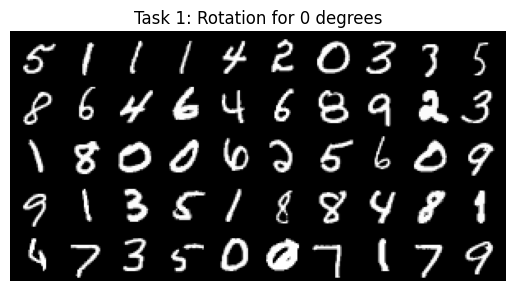

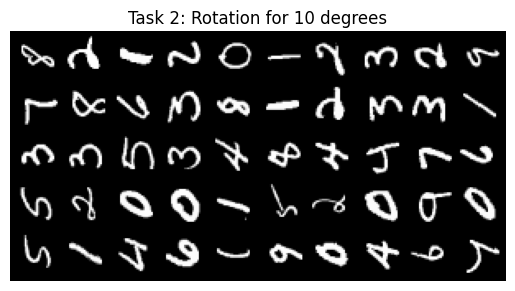

In [28]:
plot_images(task_dataloaders[0], task_idx=0) 
plot_images(task_dataloaders[9], task_idx=1) 
